In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns

In [2]:
df = pd.read_csv("compiled_raw_y.csv")
df = df.drop(columns=['Y','Y+1','Y+2','Y+3','Y+4','Y+5','Y+6','Y+7'])
df = df[df['FRSHTT'] != 0]
""" df["FRSHTT"]=str(df["FRSHTT"])
df = df[df['FRSHTT'].str.len() != 5] """

df = df[df['FRSHTT'].apply(lambda x: len(str(x)) == 5)]

df['FOG'] = df.FRSHTT.apply(lambda x: int(str(x)[0]))
df['RAIN'] = df.FRSHTT.apply(lambda x: int(str(x)[1]))
df['SNOW'] = df.FRSHTT.apply(lambda x: int(str(x)[2]))
df['HAIL'] = df.FRSHTT.apply(lambda x: int(str(x)[3]))
df['TT'] = df.FRSHTT.apply(lambda x: int(str(x)[4]))

df = df.drop(columns=['FRSHTT'])
df.reset_index(drop=True, inplace=True)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,...,TEMP,VISIB,WDSP,WEEKDAY,MONTH,FOG,RAIN,SNOW,HAIL,TT
0,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,08.05.11,74.8,999.9,87.8,75.2,...,81.5,5.9,5.3,1,5,1,0,0,0,0
1,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,04.04.12,74.3,999.9,84.2,75.2,...,79.1,5.1,1.9,4,4,1,0,0,1,0
2,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,07.04.12,69.5,999.9,80.6,71.6,...,74.9,4.1,3.4,7,4,1,0,0,1,0
3,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,27.04.12,70.1,999.9,87.8,69.8,...,78.0,3.7,7.5,6,4,1,0,0,1,0
4,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,06.05.12,74.2,999.9,91.4,75.2,...,81.9,6.0,7.6,1,5,1,0,0,1,0


In [3]:
cant_datos = df['NAME'].count()
cant_datos

179532

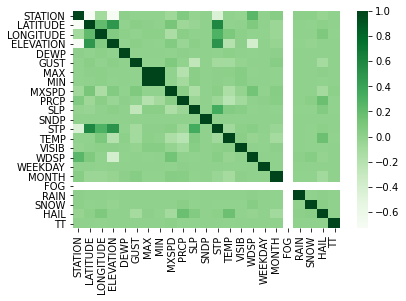

In [4]:
sns.heatmap(df.corr(), cmap="Greens", xticklabels=True, yticklabels=True)

In [5]:
df.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,...,TEMP,VISIB,WDSP,WEEKDAY,MONTH,FOG,RAIN,SNOW,HAIL,TT
count,1.795320e+05,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,160740.000000,...,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.0,179532.000000,179532.000000,179532.000000,179532.000000
mean,4.844085e+10,14.073599,100.879749,104.394748,75.480864,961.173280,91.080167,76.482596,146.320706,0.520002,...,81.170778,5.512074,6.022179,4.000234,7.200427,1.0,0.000061,0.000964,0.352166,0.000117
std,1.008017e+08,3.840676,1.675686,144.958177,66.307045,190.546042,114.689933,114.780478,344.921890,0.791673,...,3.387183,11.063337,61.852420,1.984430,2.493991,0.0,0.007827,0.031027,0.477647,0.010815
min,4.830010e+10,6.516667,97.933333,-999.900000,40.400000,9.900000,47.500000,43.700000,1.000000,0.000000,...,46.300000,0.300000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,4.837610e+10,12.500000,99.766667,12.000000,74.200000,999.900000,86.900000,73.900000,4.100000,0.050000,...,79.400000,4.700000,0.700000,2.000000,6.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,4.842710e+10,14.800000,100.566667,51.000000,75.500000,999.900000,90.100000,75.200000,7.000000,0.230000,...,81.300000,5.600000,1.800000,4.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,4.850010e+10,17.116667,102.033333,178.910000,76.600000,999.900000,93.000000,77.000000,11.100000,0.670000,...,83.200000,6.100000,3.300000,6.000000,9.000000,1.0,0.000000,0.000000,1.000000,0.000000
max,4.894610e+10,20.250000,105.033333,460.000000,9999.900000,999.900000,9999.900000,9999.900000,999.900000,18.280000,...,98.800000,999.900000,999.900000,7.000000,12.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,...,TEMP,VISIB,WDSP,WEEKDAY,MONTH,FOG,RAIN,SNOW,HAIL,TT
STATION,1.000000e+00,-7.318667e-01,-9.461181e-02,-7.153208e-01,8.522120e-03,-5.927967e-03,-1.014984e-02,-6.978445e-03,-6.945871e-02,6.839603e-02,...,-6.677067e-03,-1.599612e-02,2.460952e-01,-8.028412e-04,3.939637e-02,NaN,9.288707e-03,1.746810e-02,-3.367954e-02,4.509925e-04
LATITUDE,-7.318667e-01,1.000000e+00,2.114515e-01,4.901120e-01,-4.038767e-03,2.617639e-02,6.488117e-03,4.785313e-03,1.081687e-01,-6.498953e-02,...,-1.281289e-02,5.508821e-03,7.711669e-02,3.957137e-03,-5.106057e-02,NaN,4.184814e-03,-1.386678e-03,1.441954e-02,2.747928e-03
LONGITUDE,-9.461181e-02,2.114515e-01,1.000000e+00,6.117846e-02,1.410761e-02,-4.692701e-03,1.409579e-02,1.488924e-02,-1.419584e-01,2.926737e-02,...,9.509864e-02,1.598543e-02,-6.520508e-03,-4.407675e-03,-5.114788e-02,NaN,2.850501e-03,5.048335e-03,8.516306e-02,-5.945058e-03
ELEVATION,-7.153208e-01,4.901120e-01,6.117846e-02,1.000000e+00,-7.133828e-03,1.928105e-02,1.633386e-04,-2.362271e-03,6.172983e-02,-4.333386e-02,...,-1.850850e-01,1.176506e-02,-3.863133e-01,4.480803e-03,-3.311455e-02,NaN,-1.150318e-02,-2.337655e-02,3.376886e-04,5.234094e-03
DEWP,8.522120e-03,-4.038767e-03,1.410761e-02,-7.133828e-03,1.000000e+00,2.707104e-03,-2.748556e-04,3.214404e-04,-2.573451e-03,8.531025e-03,...,1.431540e-02,-3.479376e-04,-1.789191e-03,3.830849e-03,9.625785e-03,NaN,1.170933e-04,-1.903037e-04,1.804395e-03,-2.034965e-04
GUST,-5.927967e-03,2.617639e-02,-4.692701e-03,1.928105e-02,2.707104e-03,1.000000e+00,-6.370074e-03,-3.120303e-03,7.821142e-02,-9.112880e-03,...,-9.173956e-02,-1.833484e-02,4.516503e-03,-6.881321e-04,4.285065e-02,NaN,1.590929e-03,4.463799e-03,-1.076104e-01,2.198245e-03
MAX,-1.014984e-02,6.488117e-03,1.409579e-02,1.633386e-04,-2.748556e-04,-6.370074e-03,1.000000e+00,9.992207e-01,-9.056246e-03,-1.865346e-01,...,1.845537e-02,4.229564e-02,-2.033461e-03,4.636795e-04,-1.272953e-02,NaN,-1.705170e-04,1.316884e-04,6.303166e-03,-2.082977e-04
MIN,-6.978445e-03,4.785313e-03,1.488924e-02,-2.362271e-03,3.214404e-04,-3.120303e-03,9.992207e-01,1.000000e+00,-7.128789e-03,-1.010341e-01,...,6.833803e-05,4.175258e-02,-1.102248e-03,4.552706e-04,-3.828582e-03,NaN,-6.081129e-05,-5.170554e-04,-4.463656e-03,-2.604140e-04
MXSPD,-6.945871e-02,1.081687e-01,-1.419584e-01,6.172983e-02,-2.573451e-03,7.821142e-02,-9.056246e-03,-7.128789e-03,1.000000e+00,2.594217e-02,...,-1.486304e-01,-1.984010e-02,1.402823e-01,-2.238873e-03,4.029407e-02,NaN,3.011080e-03,3.476177e-03,-9.660554e-02,1.489651e-02
PRCP,6.839603e-02,-6.498953e-02,2.926737e-02,-4.333386e-02,8.531025e-03,-9.112880e-03,-1.865346e-01,-1.010341e-01,2.594217e-02,1.000000e+00,...,-2.152815e-01,-8.600919e-02,-3.676052e-04,9.037181e-03,3.571438e-02,NaN,3.339715e-03,2.809799e-02,1.750360e-01,-3.059684e-03


In [6]:
#sns.pairplot(df)